# Building Energy Efficiency Prediction: Modeling Heating and Cooling Loads  
### First Notebook: Introduction  

Understanding how architectural characteristics influence a building’s energy performance is key to designing more sustainable, cost-efficient, and climate-responsive constructions. This topic is particularly relevant today for cities, which are facing major environmental challenges and increasing pressure to optimize asset management. Improving the energy efficiency of public and private buildings supports both **climate transition goals** and **municipal financial sustainability** by reducing operating costs, informing better planning for new constructions, and potentially defining criteria for asset declassification.

Developed as part of the **IBM Machine Learning Professional Certificate (Deep Learning and Reinforcement Learning)**, this analysis uses the **Energy Efficiency dataset** from the **UCI Machine Learning Repository** (Tsanas & Xifara, 2012). The dataset was generated through simulations using the Ecotect software, modeling 768 building shapes under a warm-temperate climate. It provides eight architectural input features and two continuous target variables: heating load (`Y1`) and cooling load (`Y2`).  

The main objective of this study is to **predict the energy requirements (heating and cooling loads)** based on building design parameters, and to **compare the performance** of multiple regression algorithms, including linear, regularized, tree-based, and neural network models. Beyond predictive accuracy, the analysis aims to interpret the importance of design features and discuss the implications and limitations of modeling results derived from simulated data.    

**Author:** J-F Jutras  
**Date:** October 2025  
**Dataset:** *Energy Efficiency Dataset – UCI Machine Learning Repository*  
**Citation:** Tsanas, A., & Xifara, A. (2012). *Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools.* *Energy and Buildings, 49*, 560–567. [DOI: 10.1016/j.enbuild.2012.03.003](https://doi.org/10.1016/j.enbuild.2012.03.003)


## 1.1-Data Loading and Exploration

In [1]:
import pandas as pd

#Load the Excel file
df = pd.read_excel("/kaggle/input/energy-efficiency-dataset/ENB2012_data.xlsx")

#Display the first few rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


| **Building Energy Efficiency – Variables Description** |
|--------------------------------------------------------|

| Variable Name | Description                   |
|---------------|-------------------------------|
| X1            | Relative Compactness          |
| X2            | Surface Area                  |
| X3            | Wall Area                     |
| X4            | Roof Area                     |
| X5            | Overall Height                |
| X6            | Orientation                   |
| X7            | Glazing Area                  |
| X8            | Glazing Area Distribution     |
| Y1            | Heating Load                  |
| Y2            | Cooling Load                  |



In [2]:
#Create and execute a fonction to start performing EDA
def check_df(df):
    #Show all column names
    print("\nColumns: ")
    print(df.columns.to_list())

    #Show the shape of the dataset (rows, columns)
    print("\nShape: ")
    print(df.shape)

    #Show the data types of each column
    print("\nData types: ")
    print(df.dtypes)

    #Show the number of missing values in each column
    print("\nMissing values (NaN): ")
    print(df.isnull().sum())

    #Show the number of duplicated rows
    print("\nDuplicates: ")
    print(df.duplicated().sum())

    #Show general information about the DataFrame
    print("\nInfo: ")
    print(df.info())

check_df(df)    


Columns: 
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']

Shape: 
(768, 10)

Data types: 
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

Missing values (NaN): 
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Duplicates: 
0

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [3]:
#Display summary statistics for all numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [4]:
#Unique values for categorical variables
print("\nUnique values for X6 (Orientation): ")
print(df['X6'].unique())

print("\nUnique values for X8 (Glazing Area): ")
print(df['X8'].unique())


Unique values for X6 (Orientation): 
[2 3 4 5]

Unique values for X8 (Glazing Area): 
[0 1 2 3 4 5]


| **Orientation (X6) – Value Encoding** |
|---------------------------------------|

| Code | Orientation |
|------|-------------|
| 2    | North       |
| 3    | East        |
| 4    | South       |
| 5    | West        |

| **Glazing Area Distribution (X8) – Value Encoding** |
|------------------------------------------------------|

| Code | Description                                 |
|------|---------------------------------------------|
| 0    | No glazing                                  |
| 1    | Uniform distribution (all facades)          |
| 2    | Glazing concentrated on North facade        |
| 3    | Glazing concentrated on East facade         |
| 4    | Glazing concentrated on South facade        |
| 5    | Glazing concentrated on West facade         |

The dataset is clean, contains no missing values or duplicates, and includes two categorical variables (orientation and glazing distribution) encoded numerically.

With the data loaded, documented, and validated, we now move forward to the preliminary analysis to visualize feature distributions, examine correlations, and better understand the structure of the dataset.

## 1.2-Data Visualization

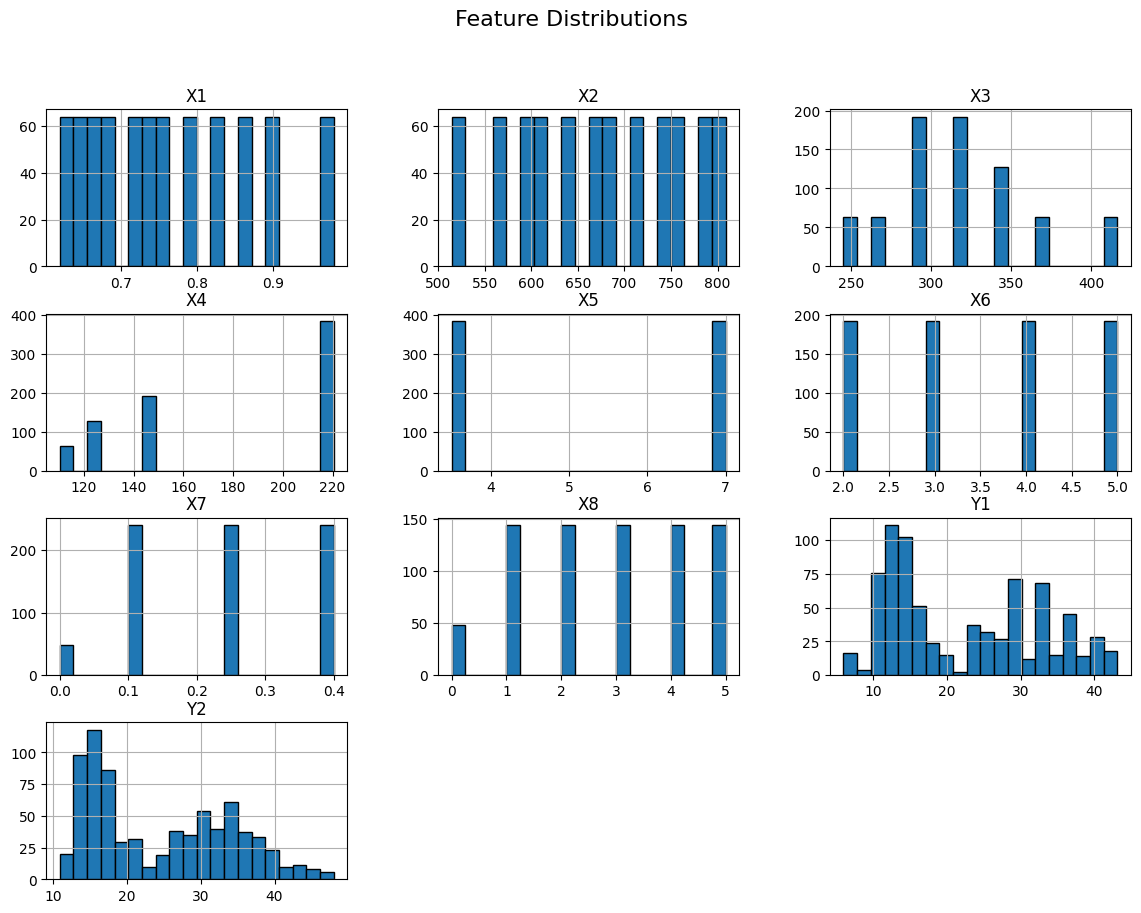

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#We plot histograms for all numerical features to understand:
#-The shape of their distribution (normal, skewed, multimodal)
#-The presence of potential outliers
#-How much variability exists in each feature

df.hist(figsize = (14, 10), bins = 20, edgecolor = 'black')
plt.suptitle("Feature Distributions", fontsize = 16)
plt.show()

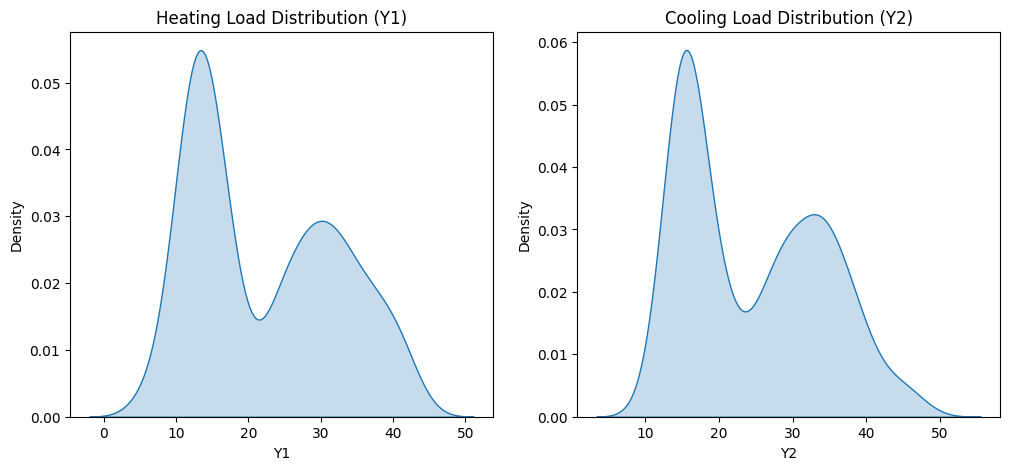

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#We use density plots (KDE) to examine how heating and cooling loads are distributed.
#This helps identify whether the prediction targets are symmetric, skewed,
#and whether they contain extreme values that may affect regression models.

import warnings
warnings.filterwarnings("ignore")

sns.kdeplot(df['Y1'], ax = axes[0], fill = True)
axes[0].set_title("Heating Load Distribution (Y1)")

sns.kdeplot(df['Y2'], ax = axes[1], fill = True)
axes[1].set_title("Cooling Load Distribution (Y2)")

plt.show()

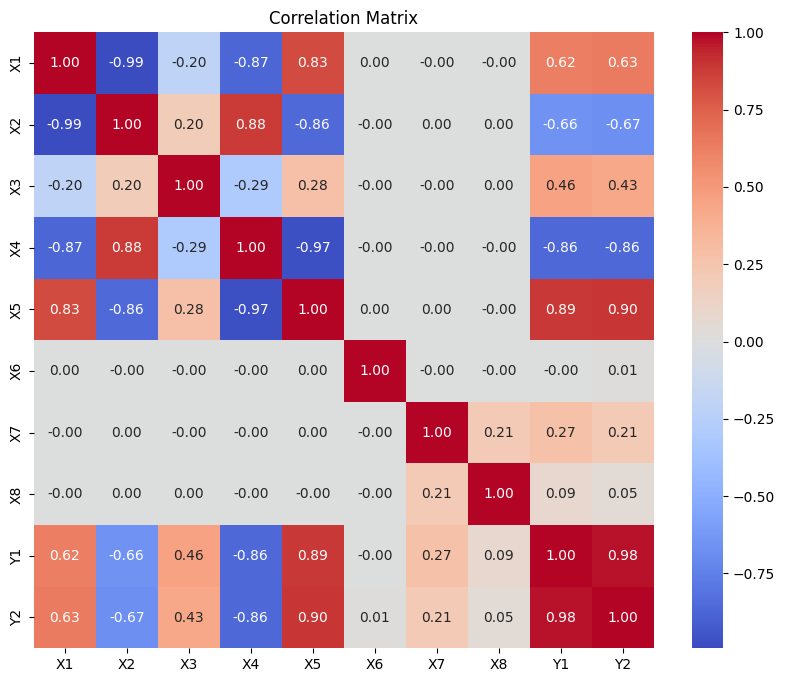

In [7]:
#A correlation matrix is essential to:
#-Identify which building features are most strongly associated with energy loads
#-Detect multicollinearity between features (important for linear models)
#-Guide feature selection and model interpretation

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

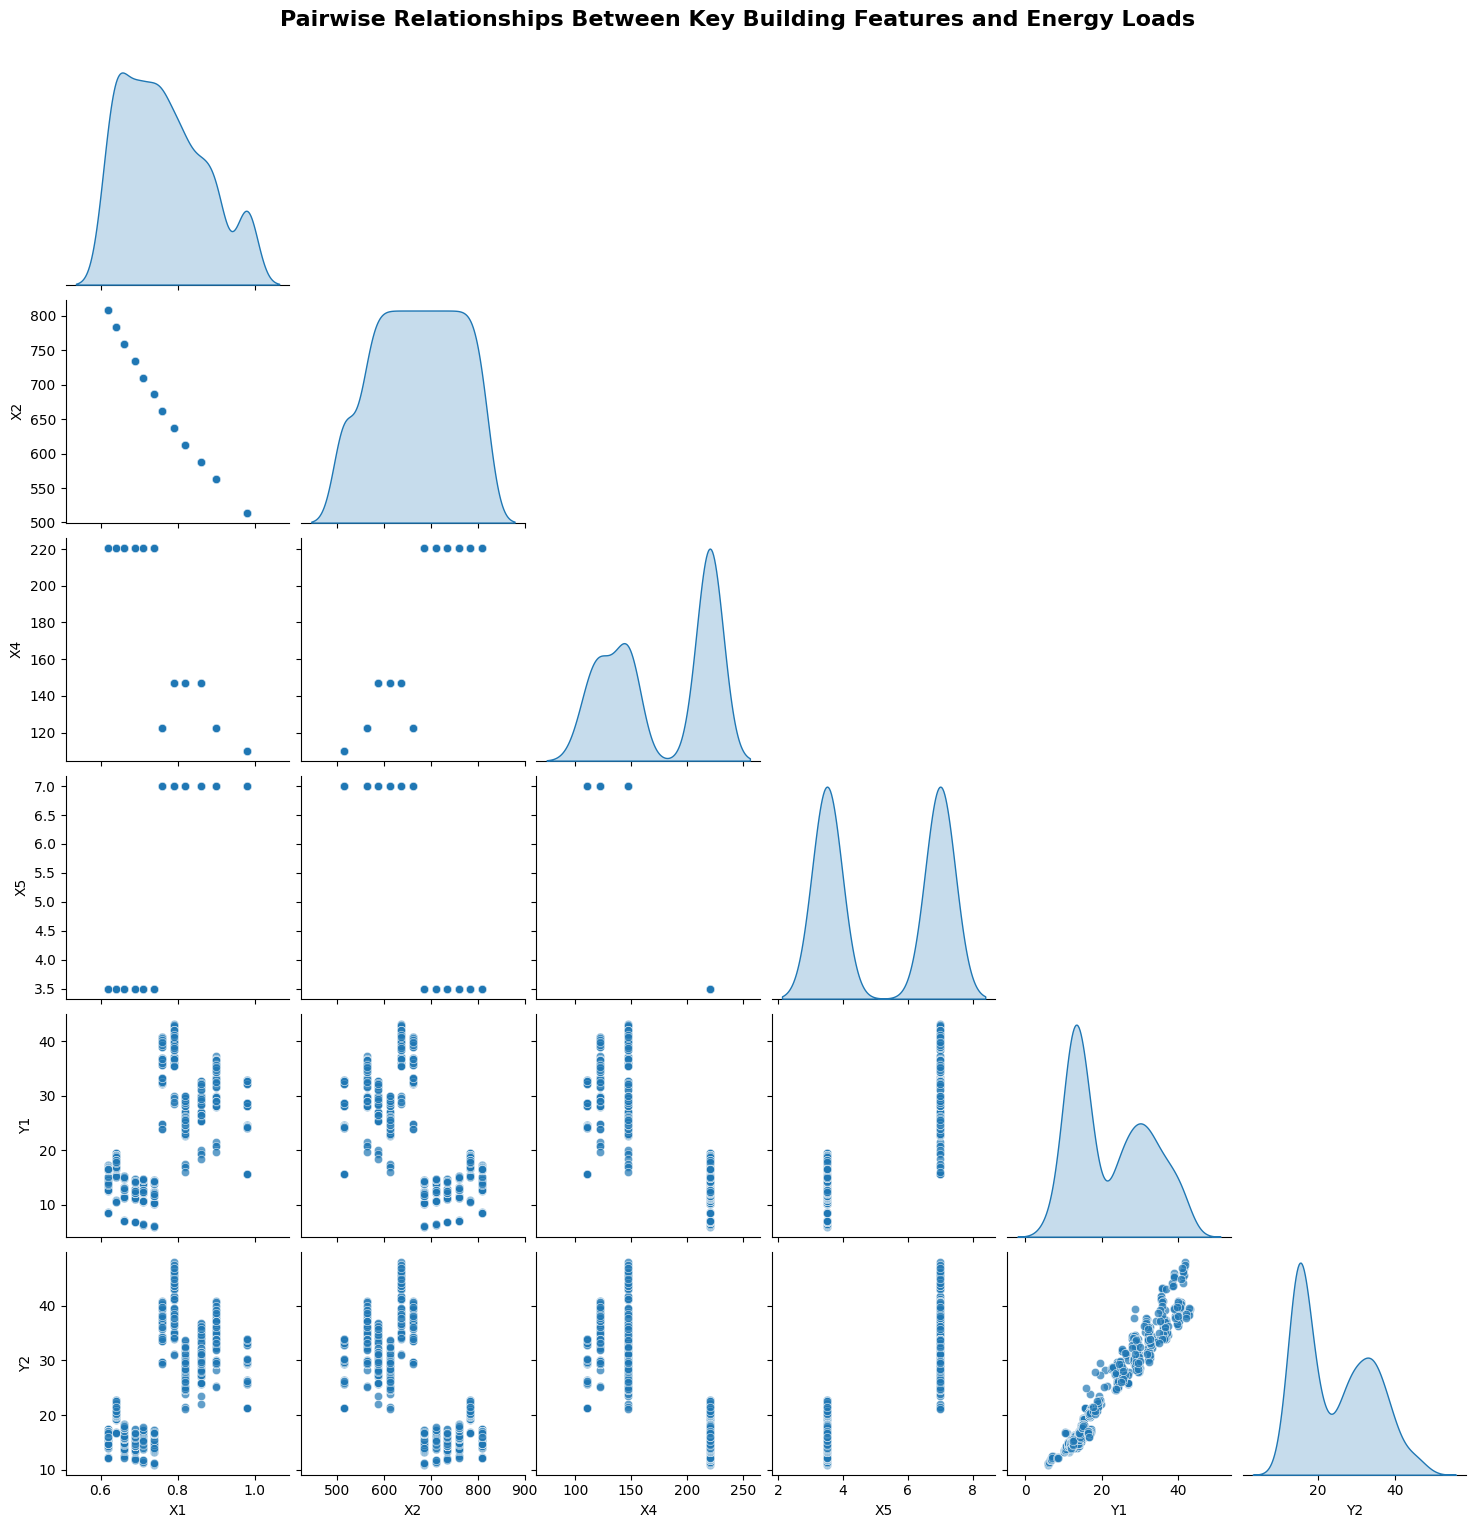

In [8]:
#We select only the most informative numerical variables
#to visualize their relationships with the target variables.

import warnings
warnings.filterwarnings("ignore")

selected_features = ['X1', 'X2', 'X4', 'X5', 'Y1', 'Y2']

sns.pairplot(
    df[selected_features],
    diag_kind = 'kde',
    corner = True,
    plot_kws = {'alpha': 0.7}
)

plt.suptitle(
    'Pairwise Relationships Between Key Building Features and Energy Loads',
    fontsize = 16,
    fontweight = 'bold',
    y = 1.02
)
plt.show()

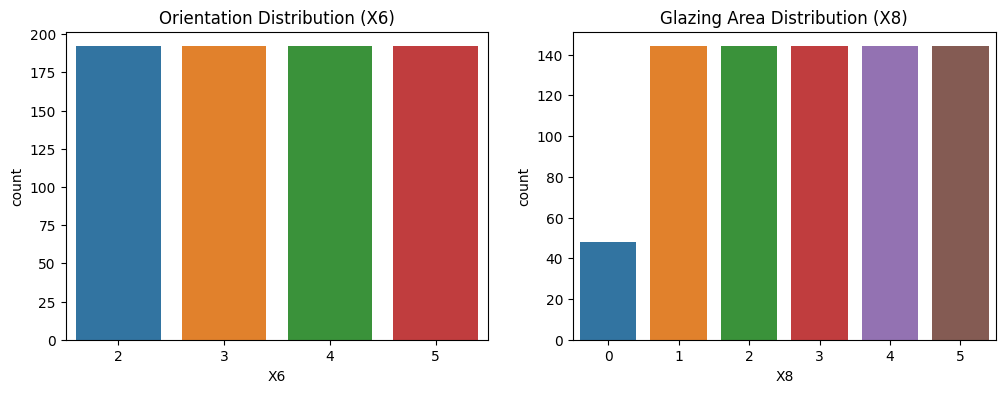

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (12,4))

#Countplots help us understand the distribution of categorical values.
#For orientation (X6), this shows whether the building orientations were balanced.
#For glazing distribution (X8), it confirms the variability of the architectural configurations.
#This ensures the dataset is not biased toward one specific design category.

sns.countplot(x = "X6", data = df, ax = axs[0])
axs[0].set_title("Orientation Distribution (X6)")

sns.countplot(x = "X8", data = df, ax = axs[1])
axs[1].set_title("Glazing Area Distribution (X8)")

plt.show()


## 1.3-Preliminary Insights

**Distribution Overview**
- Numerical features display **low skewness**, indicating mostly symmetric distributions.  
- Most variables have **negative kurtosis**, meaning flatter-than-normal shapes with fewer extreme values.  
- No strong outliers are present, suggesting stable feature variability.

---

**Categorical Variables**

**Orientation (X6)**  
- Evenly distributed across all categories (2–5).  
- Near-zero correlation with both Y1 and Y2 → minimal influence on energy loads.

**Glazing Area Distribution (X8)**  
- Almost uniformly spread across values 0–5.  
- Very weak correlations, indicating limited predictive power relative to geometric variables.

---

**Target Variables (Y1 & Y2)**
- **Heating Load (Y1)** and **Cooling Load (Y2)** show an extremely high correlation (**0.976**).  
- This indicates that both outputs reflect nearly identical thermal behavior patterns.  
- Both targets exhibit wide but controlled variability, without extreme anomalies.

---

**Key Correlations** (Y1 and Y2 distributions are not normal. These correlations are used for preliminary exploratory insights, not for formal statistical inference.)

| Feature | Corr. with Y1 | Corr. with Y2 |
|--------|----------------|----------------|
| **X5 – Overall Height** | +0.889 | +0.896 |
| **X4 – Roof Area** | −0.862 | −0.863 |
| **X2 – Surface Area** | −0.658 | −0.673 |
| **X1 – Relative Compactness** | +0.622 | +0.634 |
| **X3 – Wall Area** | +0.456 | +0.427 |

- Building height is the strongest positive driver of energy loads.  
- Larger roof and surface areas reduce loads within the simulated dataset structure.  
- Relative compactness significantly shapes energy performance.

---

**Multicollinearity**

Several feature pairs exhibit strong correlations:

- X1 ↔ X2 = **−0.99**  
- X4 ↔ X5 = **−0.97**  
- X2 ↔ X4 = **0.88**

These relationships indicate **high multicollinearity**, suggesting:
- Linear regression may require **regularization** (Ridge/Lasso).  
- Tree-based and ensemble models will be more robust.

---

**Overall Summary**
- The dataset is clean and structurally sound.  
- Energy loads are primarily determined by geometric characteristics.  
- Categorical design features (orientation, glazing distribution) play a minor role.  
- Y1 and Y2 are strongly linked, making this an excellent case for **multi-output regression**.



This preliminary analysis provides useful insights into how building geometry influences heating and cooling loads, but several limitations must be acknowledged. The dataset is entirely **simulation-based**, meaning it does not capture real-world variability in materials, occupant behavior, or evolving technological systems. Moreover, because the simulations were generated under a **warm–temperate Mediterranean climate**, the findings may not generalize to other climate zones with different thermal dynamics.

The **high multicollinearity** between several geometric features also complicates feature interpretation and may bias linear model coefficients. In addition, some architectural variables—such as orientation and glazing distribution—show **limited variability and weak correlations**, reducing their practical predictive value within this dataset. Finally, the dataset’s **modest size and controlled conditions** further restrict the generalizability of the results. Validation on real buildings or more diverse climatic and architectural contexts would be necessary to confirm the robustness of these conclusions.